In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('zomato.csv',encoding='latin-1')

In [3]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [6]:
[features for features in df.columns if df[features].isnull().sum() > 0] 

['Cuisines']

<Axes: >

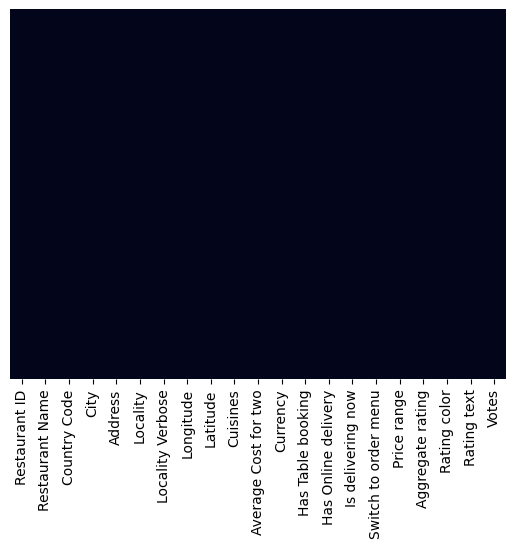

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [8]:
df_country = pd.read_excel('Country-Code.xlsx')
df_country.head()
df.shape


(9551, 21)

In [9]:
final_df = pd.merge(df,df_country,on='Country Code',how='left')
final_df.shape


(9551, 22)

In [10]:
final_df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [11]:
country_names = final_df.Country.value_counts().index
country_names

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'UAE',
       'South Africa', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Singapore', 'Qatar', 'Sri Lanka', 'Canada'],
      dtype='object', name='Country')

In [12]:
country_val = final_df.Country.value_counts().values
country_val

array([8652,  434,   80,   60,   60,   60,   40,   34,   24,   22,   21,
         20,   20,   20,    4], dtype=int64)

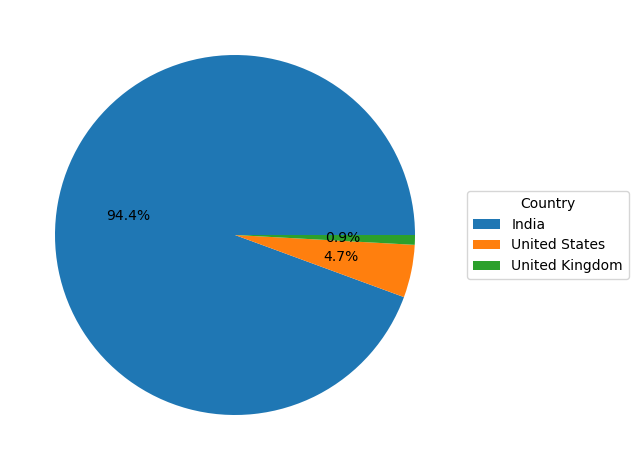

In [13]:
plt.pie(country_val[:3], autopct='%1.1f%%')
plt.legend(country_names[:3], title='Country', loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()


In [14]:
final_df.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().reset_index()
ratings = final_df.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().reset_index().rename(columns={0:'Rating Count'})

In [15]:
ratings

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

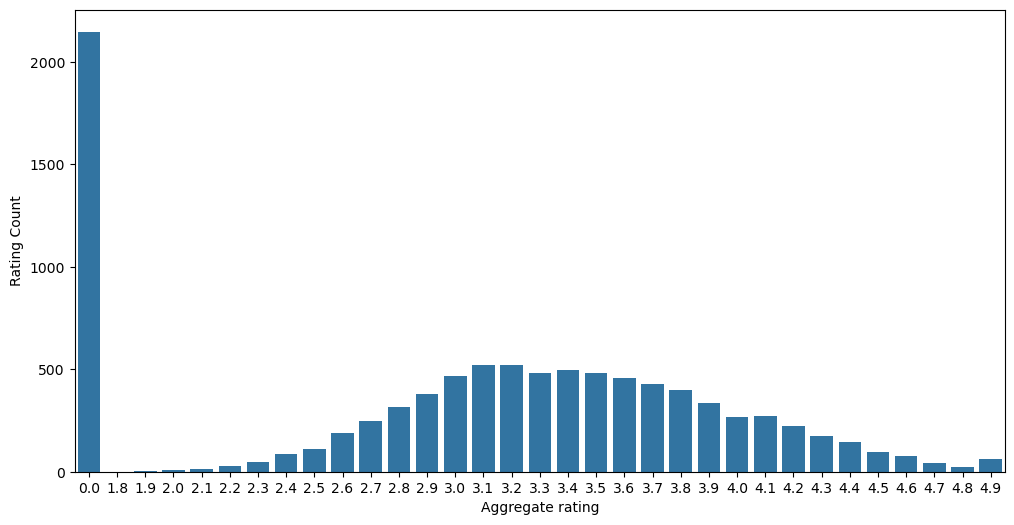

In [16]:
plt.rcParams['figure.figsize']=(12,6)
sns.barplot(x='Aggregate rating',y='Rating Count',data=ratings)

<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

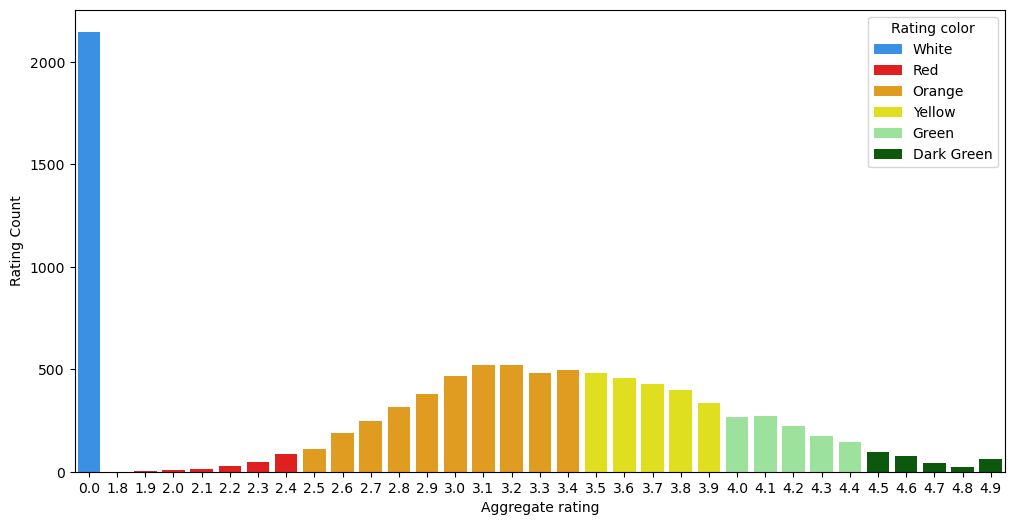

In [17]:
sns.barplot(x='Aggregate rating',y='Rating Count',hue='Rating color', data=ratings,palette=['dodgerblue','red','orange','yellow','lightgreen','darkgreen'])

C:\Users\ARCHAN\AppData\Local\Temp\ipykernel_18140\613953864.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating color',data=ratings,palette=['dodgerblue','red','orange','yellow','lightgreen','darkgreen'])


<Axes: xlabel='Rating color', ylabel='count'>

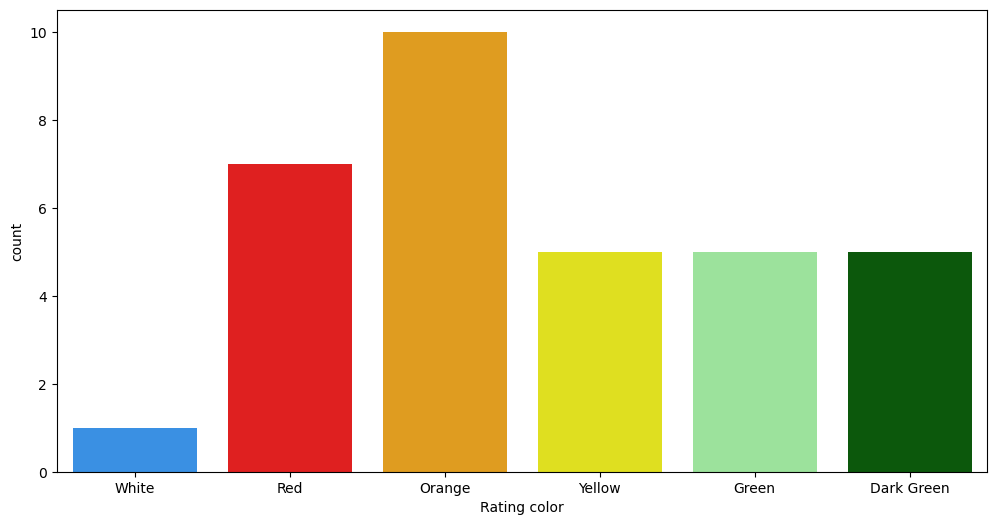

In [18]:
sns.countplot(x='Rating color',data=ratings,palette=['dodgerblue','red','orange','yellow','lightgreen','darkgreen'])

In [19]:
zero_rated = final_df[final_df['Rating color'] == 'White']

for country in zero_rated['Country'].unique():
    print(country)





Brazil
United States
India
United Kingdom


C:\Users\ARCHAN\AppData\Local\Temp\ipykernel_18140\2864253372.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count',y='Country',data=white_rated,palette='magma')


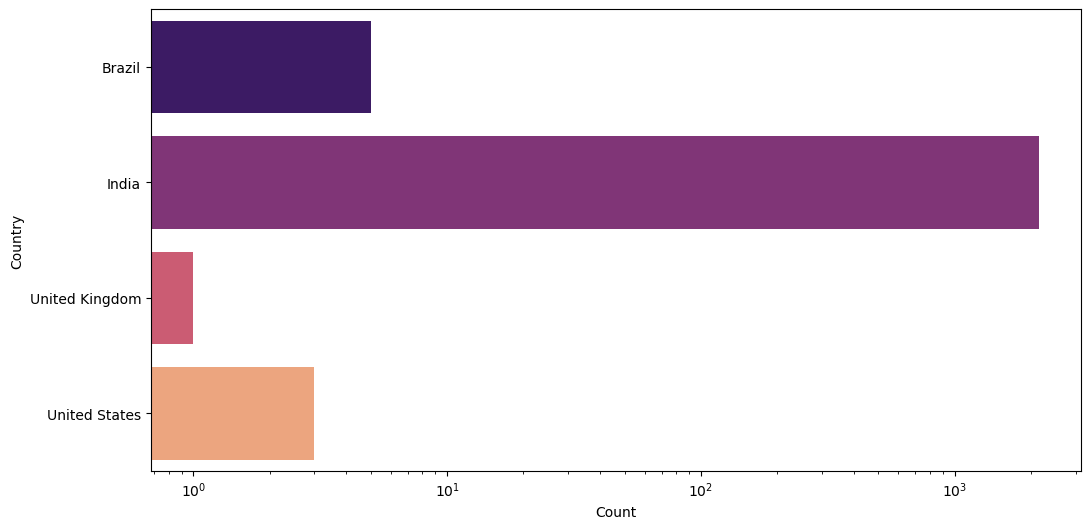

In [20]:
white_rated = final_df[final_df['Rating color'] == 'White'].groupby('Country').size().reset_index().rename(columns={0:'Count'})

sns.barplot(x='Count',y='Country',data=white_rated,palette='magma')
plt.xscale('log')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()


C:\Users\ARCHAN\AppData\Local\Temp\ipykernel_18140\3542626047.py:11: UserWarning: Glyph 140 (\x8c) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\ARCHAN\.conda\envs\ML_WORKS\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 140 (\x8c) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


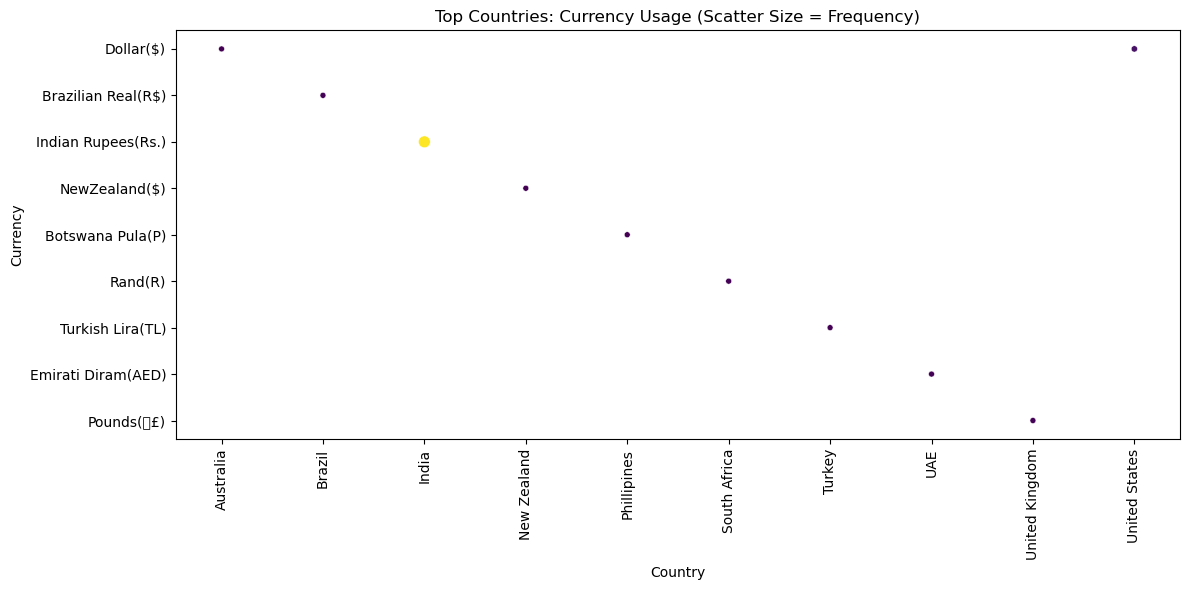

In [21]:
used_currency = final_df[['Country','Currency']].groupby(['Country','Currency']).size().reset_index().rename(columns={0:'Count'})
used_currency

top_countries = used_currency.groupby('Country')['Count'].sum().nlargest(10).index
filtered_data = used_currency[used_currency['Country'].isin(top_countries)]

plt.figure(figsize=(12,6))
sns.scatterplot(data=filtered_data, x='Country', y='Currency', size='Count', hue='Count', palette='viridis', legend=False)
plt.xticks(rotation=90)
plt.title("Top Countries: Currency Usage (Scatter Size = Frequency)")
plt.tight_layout()
plt.show()



In [22]:

import plotly.express as px

fig = px.sunburst(filtered_data, path=['Country', 'Currency'],values='Count',title="Currency Usage Sunburst Chart")
fig.show()



In [23]:
online_delivery_available = final_df[final_df['Has Online delivery'] == 'Yes'].Country.value_counts().reset_index()
online_delivery_available.columns = ['Country', 'Count']

fig = px.funnel(online_delivery_available, x='Count', y='Country')
fig.show()



In [24]:
city_counts = final_df['City'].value_counts().reset_index()
city_counts.columns = ['City', 'Count']

fig = px.bar(city_counts[:10], x='City', y='Count',
             title='Top 10 Cities by Record Count',
             labels={'Count': 'Number of Entries'},
             color='Count',
             color_continuous_scale='viridis')
fig.show()


In [25]:
fig = px.pie(city_counts[:5], values='Count', names='City',
             title='Top 5 Cities (Pie Chart)',
             hole=0.3)
fig.show()


In [ ]:

top_cuisines = final_df['Cuisines'].value_counts().reset_index()
top_cuisines.columns = ['Cuisines', 'Count']

fig = px.scatter(top_cuisines[:10], x='Cuisines', y='Count',
                    size='Count', color='Count', size_max=60,
                    title="Top 10 Cuisines (2D Bubble View)")
fig.show()


In [27]:
restaurants = final_df['Restaurant Name'].value_counts().reset_index()
restaurants.columns = ['Restaurant Name' , 'count']

top5_restaurant = restaurants.head(5)
fig = px.treemap(top5_restaurant,path=['Restaurant Name'],values='count',title='Top 5 Restaurant')
fig.show()




In [28]:
price_range = final_df['Price range'].value_counts().reset_index()
price_range.columns = ['Price range','count']


fig = px.bar(price_range, 
             x='Price range', 
             y='count', 
             text='count',
             color='Price range',
             title='Distribution of Price Ranges( 1 to 4 )')

fig.update_traces(textposition='outside')
fig.show()




In [30]:
import pickle

pickle.dump(final_df,open('dataframe.pkl','wb'))


In [32]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [ ]:
cost_for_two = final_df.groupby('Country')['Average Cost for two'].mean().reset_index()

top5_countries = cost_for_two.sort_values('Average Cost for two', ascending=False).head(5)['Country']

filtered_df = final_df[final_df['Country'].isin(top5_countries)]


fig = px.box(
    filtered_df,
    x='Country',
    y='Average Cost for two',
    color='Country',
    title='Box Plot: Avg Cost for Two in Top 5 Countries',
    labels={'Average Cost for two': 'Avg Cost for 2'}
)
fig.show()


